 # The main Assumptions of Linear Regression

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('data.csv')

In [93]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [94]:
X = df.drop('target', axis=1)
y = df['target']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [96]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred = lr.predict(X_test)

In [98]:
residual = y_test - y_pred
residual

58     32.308068
40      0.469044
34    -31.328091
102    22.081161
184   -19.482249
198    14.538118
95    -13.061868
4      -6.400560
29     39.202565
168   -29.290449
171     4.752482
18    -19.575694
11     -3.006519
89    -10.392463
110   -21.258880
118    11.557545
159     8.624475
35    -18.070497
136    -4.940765
59     35.614240
51     20.123998
16     12.273934
44    -26.318601
94    -45.953275
31      3.377609
162   -11.495436
38     10.971807
28      6.303389
193   -12.763183
27      8.718835
47    -14.223529
165    15.871494
194     8.465019
177    20.245673
176   -20.197709
97     14.876704
174    -3.579682
73     24.320424
69    -18.932354
172     4.893949
108    22.493346
107   -37.729243
189   -28.401771
14    -41.041903
56     11.185857
19      2.093656
114   -12.963090
39     18.615671
185   -22.478711
124    12.422030
98     -2.292401
123     7.673697
119    20.010544
53      7.098087
33      0.779413
179    33.592062
181   -23.140018
106    20.907780
199    -2.7446

### 1. Linear Relationship

Text(0.5, 1.0, 'Feature3')

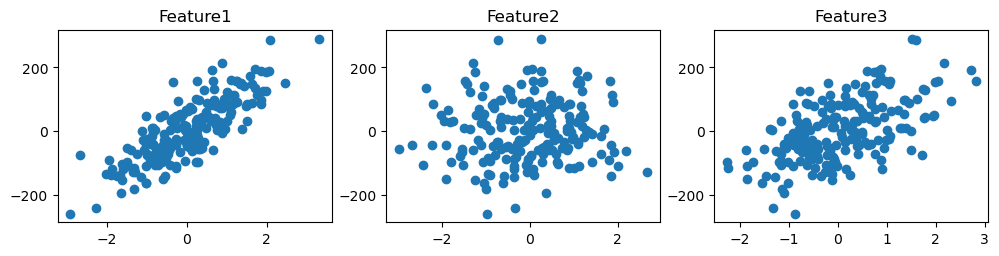

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

### 2. Multicollinearity

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [101]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


<Axes: >

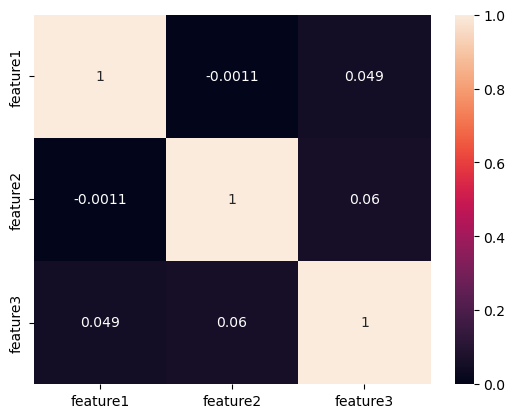

In [102]:
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

### 3. Normality of Residual

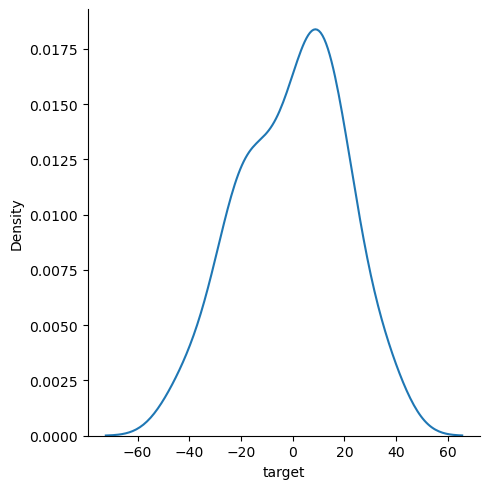

In [103]:
sns.displot(residual,kind='kde')

((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([-45.95327491, -41.04190332, -37.72924312, -31.32809124,
         -29.29044906, -28.40177141, -26.3186

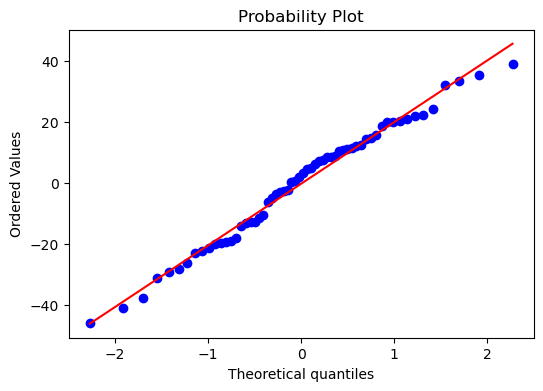

In [104]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

### 4. Homoscedasticity

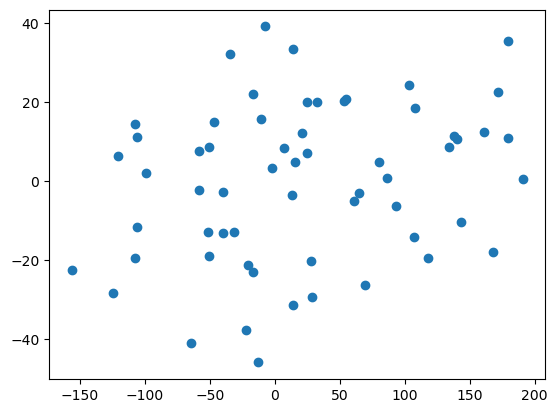

In [105]:
plt.scatter(y_pred,residual)

### 5. Autocorrelation of Residuals

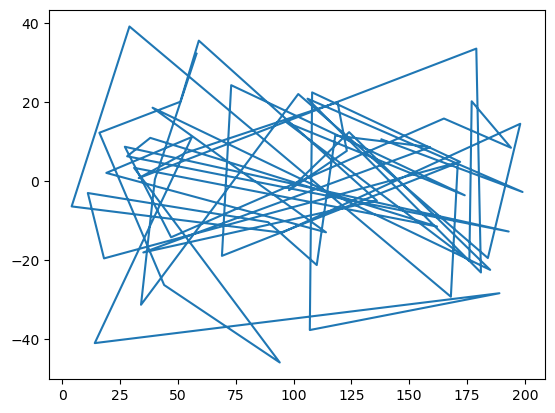

In [106]:
plt.plot(residual)